In [2]:
import pandas as pd
import plotly.express as px
from dash import dcc
import numpy as np

In [3]:
spacex_df = pd.read_csv("data/spacex_launch_dash.csv")
spacex_df.head()

,Unnamed: 0,Flight Number,Launch Site,class,Payload Mass (kg),Booster Version,Booster Version Category
0,0,1,CCAFS LC-40,0,0.0,F9 v1.0 B0003,v1.0
1,1,2,CCAFS LC-40,0,0.0,F9 v1.0 B0004,v1.0
2,2,3,CCAFS LC-40,0,525.0,F9 v1.0 B0005,v1.0
3,3,4,CCAFS LC-40,0,500.0,F9 v1.0 B0006,v1.0
4,4,5,CCAFS LC-40,0,677.0,F9 v1.0 B0007,v1.0


In [4]:
sites = spacex_df["Launch Site"].unique()

options = [{'label': 'All Sites', 'value': 'ALL'}] 
for site in spacex_df["Launch Site"].unique(): 
    options.append({ 'label':site, 'value':site })

sites[0]

'CCAFS LC-40'

In [5]:
entered_site = 'CCAFS LC-40'

filtered_df = spacex_df[spacex_df["Launch Site"]==entered_site]
grouped_df = filtered_df.groupby('class').size().reset_index(name='counts')

fig = px.pie(grouped_df, values='counts', 
    names= 'class' , 
    title='Total Success Launches for site ' + entered_site )
fig.show()

dcc.RangeSlider(id='payload-slider',
                min=0, max=10000, step=1000,
                marks={0: '0', 100: '100'},
                value=[np.min(spacex_df[['Payload Mass (kg)']]), 
                       np.max(spacex_df[['Payload Mass (kg)']])
                       ]
                )

                                

RangeSlider(min=0, max=10000, step=1000, marks={0: '0', 100: '100'}, value=[0.0, 9600.0], id='payload-slider')

In [6]:
(spacex_df[['Payload Mass (kg)']]).max()

Payload Mass (kg)    9600.0
dtype: float64

In [13]:
#def get_payload_chart(launch_site, payload_mass):
#    if launch_site == 'ALL':
max_payload = spacex_df['Payload Mass (kg)'].max()
min_payload = spacex_df['Payload Mass (kg)'].min()
launch_site = 'CCAFS LC-40'
#payload_mass = [min_payload,max_payload]
payload_mass = [2000,5000]


version = False
if version :
    fig = px.scatter(spacex_df[spacex_df['Payload Mass (kg)'].between(payload_mass[0],payload_mass[1])], 
        y='class', 
        x='Payload Mass (kg)', 
        color="Booster Version Category",
        hover_data=['Launch Site'],
        title='class vs Payload Mass (kg)')
    fig.show()
else:
    # return the outcomes piechart for a selected site
    filtered_df = spacex_df[spacex_df["Launch Site"]==launch_site]
    filtered_df = filtered_df[filtered_df['Payload Mass (kg)'].between(payload_mass[0],payload_mass[1])]
    fig = px.scatter(filtered_df, 
        y='class', 
        x='Payload Mass (kg)', 
        color="Booster Version Category",
        hover_data=['Launch Site'],
        title='Class vs Payload Mass (kg) at ' + launch_site)
    fig.show()

1. Which site has the largest successful launches?

In [30]:
spacex_df['Launch Site'].value_counts()

Launch Site
CCAFS LC-40     26
KSC LC-39A      13
VAFB SLC-4E     10
CCAFS SLC-40     7
Name: count, dtype: int64

2. Which site has the highest launch success rate?

In [31]:
spacex_df.groupby("Launch Site")["class"].mean().sort_values(ascending=False)

Launch Site
KSC LC-39A      0.769231
CCAFS SLC-40    0.428571
VAFB SLC-4E     0.400000
CCAFS LC-40     0.269231
Name: class, dtype: float64

3. Which payload range(s) has the highest launch success rate?

In [57]:
spacex_df.groupby("Payload Mass (kg)")["class"].mean().sort_values(ascending=False)
print( "max: ", max_payload,", min: " , min_payload)
bins = np.dot((max_payload - min_payload), [0,1,2,3,4,5,6,7,8,9,10])
counts, bin_edges = np.histogram(spacex_df['Payload Mass (kg)'], bins)

print(f"INTERVALO     CONTADOR")
for low, hight, count in zip(bin_edges, np.roll(bin_edges, -1), counts):
    print(f"{f'{low}-{hight}': <10}    {count}")

# df[df.tamaño.between(5,7) & df.peso.between(1,5)]


max:  9600.0 , min:  0.0
INTERVALO     CONTADOR
0.0-9600.0    51
9600.0-19200.0    5
19200.0-28800.0    0
28800.0-38400.0    0
38400.0-48000.0    0
48000.0-57600.0    0
57600.0-67200.0    0
67200.0-76800.0    0
76800.0-86400.0    0
86400.0-96000.0    0


0.42857142857142855

In [76]:
bins = np.dot((max_payload - min_payload)/10, [0,1,2,3,4,5,6,7,8,9,10])
print("bins:", bins)
interlist = []
minlist = []
maxlist = []
successratelist = []
for c in range (8):
    bin = spacex_df[spacex_df['Payload Mass (kg)'].between(bins[c],bins[c+1])]
    interlist.append(c+1)
    minlist.append(bins[c])
    maxlist.append(bins[c+1])
    successratelist.append(bin['class'].mean())
#    print (bin[ ['Payload Mass (kg)', 'class']].head(), "c: ", c, "(",bins[c],",", bins[c+1] ," )", quantity)
pd.Dataframe(
    "intervalo": interlist,
    "mímimo": minlist,
    "máximo": maxlist,
    "successrate": successratelist
)

bins: [   0.  960. 1920. 2880. 3840. 4800. 5760. 6720. 7680. 8640. 9600.]
   Payload Mass (kg)  class
0                0.0      0
1                0.0      0
2              525.0      0
3              500.0      0
4              677.0      0 c:  0 ( 0.0 , 960.0  ) [0.2]
    Payload Mass (kg)  class
8              1316.0      0
15             1898.0      0 c:  1 ( 960.0 , 1920.0  ) [0.2, 0.0]
    Payload Mass (kg)  class
7              2296.0      0
11             2216.0      0
12             2395.0      0
17             1952.0      1
18             2034.0      1 c:  2 ( 1920.0 , 2880.0  ) [0.2, 0.0, 0.5454545454545454]
    Payload Mass (kg)  class
5              3170.0      0
6              3325.0      0
20             3136.0      1
22             3100.0      1
23             3600.0      0 c:  3 ( 2880.0 , 3840.0  ) [0.2, 0.0, 0.5454545454545454, 0.7272727272727273]
    Payload Mass (kg)  class
9              4535.0      0
10             4428.0      0
14             4159.0      0
16   

[0.2,
 0.0,
 0.5454545454545454,
 0.7272727272727273,
 0.2857142857142857,
 0.5,
 0.0,
 0.0]

In [52]:
px.histogram(spacex_df, x='Payload Mass (kg)' )

max:  9600.0 , min:  0.0


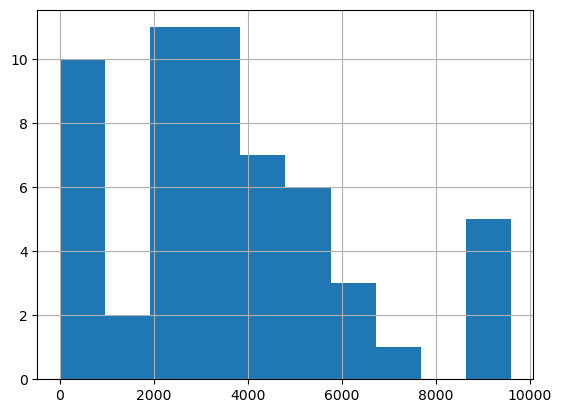

In [47]:
import matplotlib
import matplotlib.pyplot as plt


spacex_df['Payload Mass (kg)'].hist(bins=10)
plt.show()

# bins = [0.50, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59]
# counts, bin_edges = np.histogram(datos, bins)

4. Which payload range(s) has the lowest launch success rate?

5. Which F9 Booster version (v1.0, v1.1, FT, B4,B5, etc.) has the highest launch success rate?